# Rolling mean

Rolling means are tricky. As a result, we have not implemented any rolling mean or rolling window directly in **scmdata**. This notebook goes through some different options for rolling means and some possible pitfalls.

In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scmdata

<IPython.core.display.Javascript object>

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.xmargin"] = 0

In [3]:
pd.set_option("display.max_columns", 100)

## Toy data

In [4]:
time = np.array([
    dt.datetime(y, m, 1)
    for y in range(1850, 1960 + 1)
    for m in range(1, 12 + 1)
])

norm_kwargs = {"scale": 0.1, "size": time.shape}
data_1 = (
    0.3 * np.sin(np.arange(time.shape[0]) * 2 * np.pi / (150 * 12)) 
    + 5 * np.sin(np.arange(time.shape[0]) * 2 * np.pi / (1 * 12)) 
    + np.random.normal(**norm_kwargs)
)
data_2 = (
    0.3 * np.cos(np.arange(time.shape[0]) * 2 * np.pi / (1000 * 12)) 
    + 5 * np.random.normal(**norm_kwargs)
)
start = scmdata.ScmRun(
    data=np.vstack([data_1, data_2]).T,
    index=time,
    columns={
        "model": "model",
        "scenario": "piControl",
        "climate_model": ["a", "b"],
        "variable": "tas", 
        "unit": "K",
        "region": "World",
        "id": "raw",
    }
)
start

<scmdata.ScmRun (timeseries: 2, timepoints: 1332)>
Time:
	Start: 1850-01-01T00:00:00
	End: 1960-12-01T00:00:00
Meta:
	  climate_model   id  model region   scenario unit variable
	0             a  raw  model  World  piControl    K      tas
	1             b  raw  model  World  piControl    K      tas

In [5]:
pkwargs = dict(
    hue="id",
    style="climate_model",
    alpha=0.8,
)

<AxesSubplot:xlabel='time', ylabel='K'>

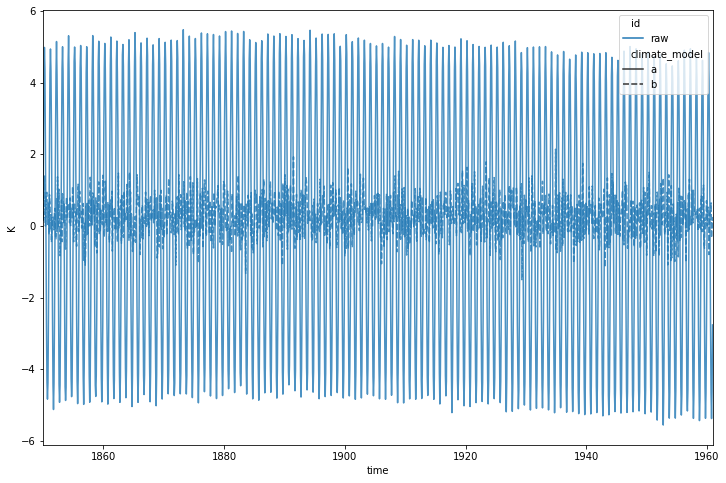

In [6]:
start.lineplot(**pkwargs)

## Naive rolling mean

The simplest way to calculate a rolling mean is to firstly get a `pd.DataFrame` using the `timeseries` method of the `ScmRun` object and then apply pandas' rolling methods (and potentially casting straight back to an `ScmRun` object thereafter).

As a first example, we can take a rolling mean with a window size of 252 (which is 21 years given our monthly timestep).

,,,,,,time,1850-01-01,1850-02-01,1850-03-01,1850-04-01,1850-05-01,1850-06-01,1850-07-01,1850-08-01,1850-09-01,1850-10-01,1850-11-01,1850-12-01,1851-01-01,1851-02-01,1851-03-01,1851-04-01,1851-05-01,1851-06-01,1851-07-01,1851-08-01,1851-09-01,1851-10-01,1851-11-01,1851-12-01,1852-01-01,1852-02-01,1852-03-01,1852-04-01,1852-05-01,1852-06-01,1852-07-01,1852-08-01,1852-09-01,1852-10-01,1852-11-01,1852-12-01,1853-01-01,1853-02-01,1853-03-01,1853-04-01,1853-05-01,1853-06-01,1853-07-01,1853-08-01,1853-09-01,1853-10-01,1853-11-01,1853-12-01,1854-01-01,1854-02-01,...,1956-11-01,1956-12-01,1957-01-01,1957-02-01,1957-03-01,1957-04-01,1957-05-01,1957-06-01,1957-07-01,1957-08-01,1957-09-01,1957-10-01,1957-11-01,1957-12-01,1958-01-01,1958-02-01,1958-03-01,1958-04-01,1958-05-01,1958-06-01,1958-07-01,1958-08-01,1958-09-01,1958-10-01,1958-11-01,1958-12-01,1959-01-01,1959-02-01,1959-03-01,1959-04-01,1959-05-01,1959-06-01,1959-07-01,1959-08-01,1959-09-01,1959-10-01,1959-11-01,1959-12-01,1960-01-01,1960-02-01,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01
climate_model,id,model,region,scenario,unit,variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,252 window rolling mean,model,World,piControl,K,tas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.232946,-0.233391,-0.234213,-0.234467,-0.235021,-0.234727,-0.235618,-0.236349,-0.236456,-0.236843,-0.236964,-0.237650,-0.238468,-0.239213,-0.238892,-0.240012,-0.241019,-0.240819,-0.241178,-0.243014,-0.243712,-0.24428,-0.243705,-0.244704,-0.245911,-0.246908,-0.247540,-0.247355,-0.247888,-0.248481,-0.247709,-0.248995,-0.249818,-0.250129,-0.249527,-0.250039,-0.250263,-0.250624,-0.250414,-0.250947,-0.251927,-0.251973,-0.253188,-0.253075,-0.252707,-0.253189,-0.253672,-0.25411,-0.254309,-0.254077
b,252 window rolling mean,model,World,piControl,K,tas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.210923,0.213735,0.210227,0.217619,0.212429,0.209761,0.211459,0.211847,0.210416,0.210643,0.209643,0.212375,0.214479,0.216657,0.214377,0.216302,0.216183,0.216410,0.214789,0.213191,0.213380,0.21472,0.212935,0.213706,0.212848,0.216569,0.220613,0.221990,0.219953,0.218338,0.223136,0.227006,0.222658,0.221916,0.224343,0.223031,0.220615,0.225230,0.226255,0.225682,0.225157,0.228785,0.221788,0.215401,0.217248,0.220295,0.223132,0.21936,0.221185,0.218413


<AxesSubplot:xlabel='time', ylabel='K'>

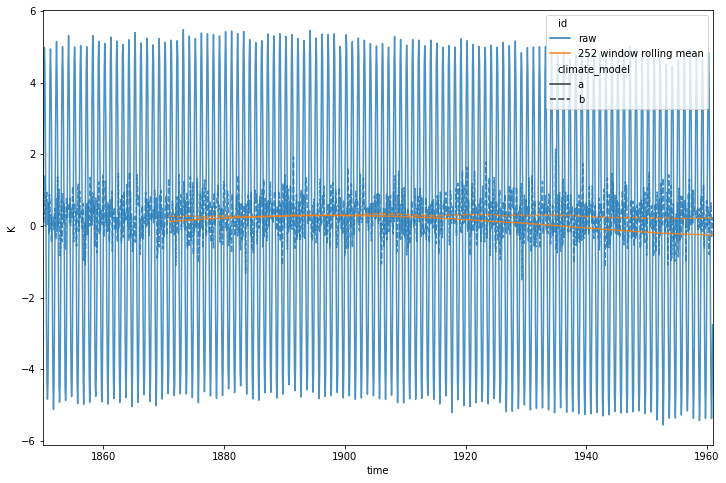

In [7]:
rolling_mean_252_window = scmdata.ScmRun(start.timeseries().rolling(window=252, axis="columns").mean())
rolling_mean_252_window["id"] = "252 window rolling mean"
display(rolling_mean_252_window.timeseries())
scmdata.run_append([start, rolling_mean_252_window]).lineplot(**pkwargs)

## Centred rolling mean

By default, pandas puts the output of its rolling functions on the last point of the window (this is why there is a gap in the rolling mean between 1850 and 1853). This can be altered using the `center` keyword argument to `rolling`.

,,,,,,time,1850-01-01,1850-02-01,1850-03-01,1850-04-01,1850-05-01,1850-06-01,1850-07-01,1850-08-01,1850-09-01,1850-10-01,1850-11-01,1850-12-01,1851-01-01,1851-02-01,1851-03-01,1851-04-01,1851-05-01,1851-06-01,1851-07-01,1851-08-01,1851-09-01,1851-10-01,1851-11-01,1851-12-01,1852-01-01,1852-02-01,1852-03-01,1852-04-01,1852-05-01,1852-06-01,1852-07-01,1852-08-01,1852-09-01,1852-10-01,1852-11-01,1852-12-01,1853-01-01,1853-02-01,1853-03-01,1853-04-01,1853-05-01,1853-06-01,1853-07-01,1853-08-01,1853-09-01,1853-10-01,1853-11-01,1853-12-01,1854-01-01,1854-02-01,...,1956-11-01,1956-12-01,1957-01-01,1957-02-01,1957-03-01,1957-04-01,1957-05-01,1957-06-01,1957-07-01,1957-08-01,1957-09-01,1957-10-01,1957-11-01,1957-12-01,1958-01-01,1958-02-01,1958-03-01,1958-04-01,1958-05-01,1958-06-01,1958-07-01,1958-08-01,1958-09-01,1958-10-01,1958-11-01,1958-12-01,1959-01-01,1959-02-01,1959-03-01,1959-04-01,1959-05-01,1959-06-01,1959-07-01,1959-08-01,1959-09-01,1959-10-01,1959-11-01,1959-12-01,1960-01-01,1960-02-01,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01
climate_model,id,model,region,scenario,unit,variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,252 window rolling mean centred,model,World,piControl,K,tas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,252 window rolling mean centred,model,World,piControl,K,tas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time', ylabel='K'>

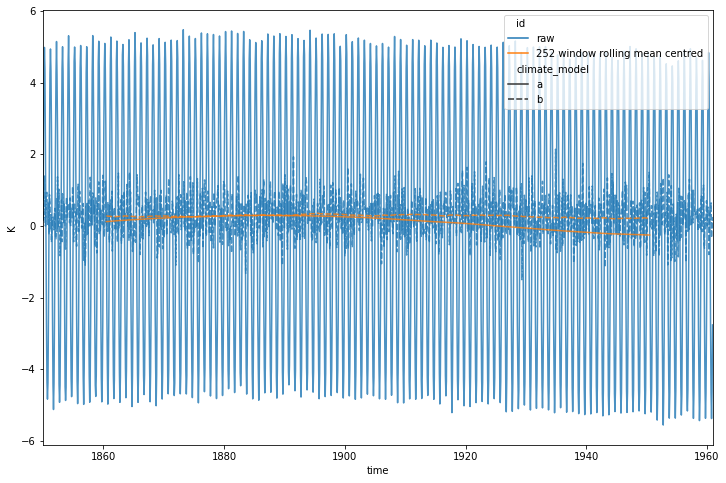

In [8]:
rolling_mean_252_window_centred = scmdata.ScmRun(start.timeseries().rolling(window=252, axis="columns", center=True).mean())
rolling_mean_252_window_centred["id"] = "252 window rolling mean centred"
display(rolling_mean_252_window_centred.timeseries())
scmdata.run_append([start, rolling_mean_252_window_centred]).lineplot(**pkwargs)

The output of the rolling window is now set on the centre of the windows. As a result, we end up with nans (gaps in the plot above) at the start and end of the rolling mean.

## Centred rolling mean with less strict data completeness requirements

By default, pandas will output nan in any window which contains fewer points than the window width. This can be altered using the `min_periods` keyword argument. Using this argument, we can get a rolling mean with no nans (i.e. whatever points available will be used).

,,,,,,time,1850-01-01,1850-02-01,1850-03-01,1850-04-01,1850-05-01,1850-06-01,1850-07-01,1850-08-01,1850-09-01,1850-10-01,1850-11-01,1850-12-01,1851-01-01,1851-02-01,1851-03-01,1851-04-01,1851-05-01,1851-06-01,1851-07-01,1851-08-01,1851-09-01,1851-10-01,1851-11-01,1851-12-01,1852-01-01,1852-02-01,1852-03-01,1852-04-01,1852-05-01,1852-06-01,1852-07-01,1852-08-01,1852-09-01,1852-10-01,1852-11-01,1852-12-01,1853-01-01,1853-02-01,1853-03-01,1853-04-01,1853-05-01,1853-06-01,1853-07-01,1853-08-01,1853-09-01,1853-10-01,1853-11-01,1853-12-01,1854-01-01,1854-02-01,...,1956-11-01,1956-12-01,1957-01-01,1957-02-01,1957-03-01,1957-04-01,1957-05-01,1957-06-01,1957-07-01,1957-08-01,1957-09-01,1957-10-01,1957-11-01,1957-12-01,1958-01-01,1958-02-01,1958-03-01,1958-04-01,1958-05-01,1958-06-01,1958-07-01,1958-08-01,1958-09-01,1958-10-01,1958-11-01,1958-12-01,1959-01-01,1959-02-01,1959-03-01,1959-04-01,1959-05-01,1959-06-01,1959-07-01,1959-08-01,1959-09-01,1959-10-01,1959-11-01,1959-12-01,1960-01-01,1960-02-01,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01
climate_model,id,model,region,scenario,unit,variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,252 window rolling mean centred,model,World,piControl,K,tas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b,252 window rolling mean centred,model,World,piControl,K,tas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time', ylabel='K'>

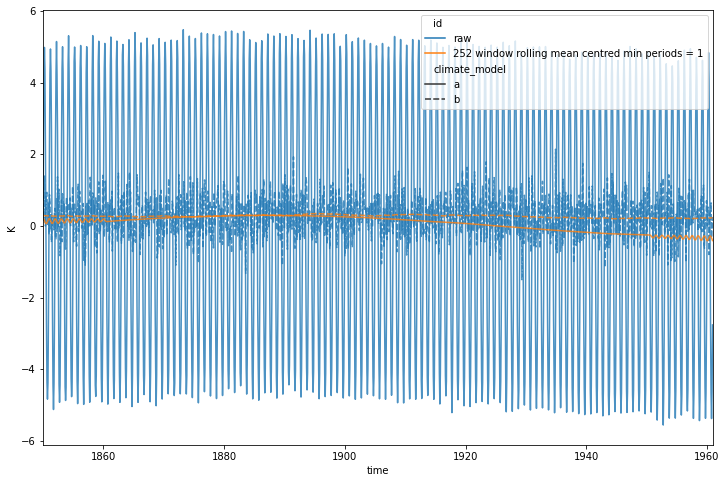

In [9]:
rolling_mean_252_window_centred_min_periods_1 = (
    scmdata.ScmRun(start.timeseries().rolling(window=252, axis="columns", center=True, min_periods=1).mean())
)
rolling_mean_252_window_centred_min_periods_1["id"] = "252 window rolling mean centred min periods = 1"
display(rolling_mean_252_window_centred.timeseries())
scmdata.run_append([start, rolling_mean_252_window_centred_min_periods_1]).lineplot(**pkwargs)

Using `min_periods=1` removes the nans. However, in data with a strong seasonal cycle, simply using `min_periods=1` introduces a seasonal cycle into the rolling mean at the edges of the data. The reason for this feature is that the rolling means are being calculated on windows which do not include the same number of each month (e.g. there might be fewer Decembers than Junes), which effectively introduces the seasonal cycle into the rolling mean.

Depending on the application of interest, this could be a problem.

(-0.5, 0.5)

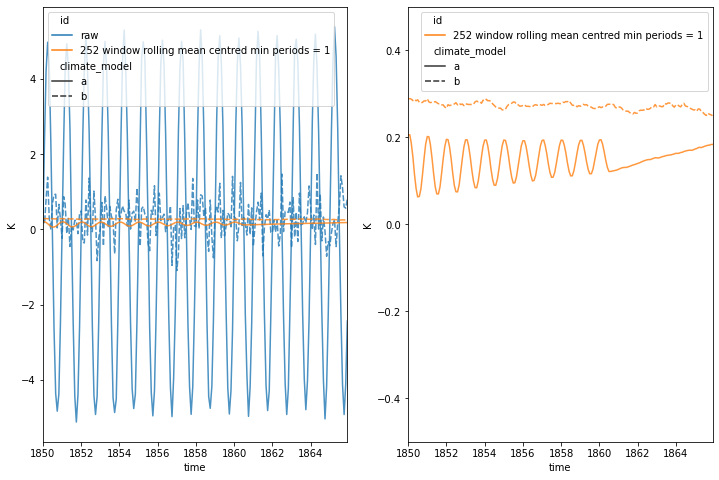

In [10]:
pdf = scmdata.run_append([start, rolling_mean_252_window_centred_min_periods_1])

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pdf.filter(year=range(1850, 1865 + 1)).lineplot(**pkwargs, ax=ax1)
pdf.filter(year=range(1850, 1865 + 1), **{"id": "*rolling mean*"}).lineplot(**pkwargs, ax=ax2, palette=["tab:orange"])
ax2.set_ylim([-0.5, 0.5])

## Workarounds at data edges

- in middle, all sort of fine
- at edges, lots of choices

- discuss annual-mean case (take annual-mean first, then rolling mean and seasonal cycle isn't an issue)
- if you want monthly data, probably best to nonetheless use annual-mean first then rolling mean then interpolate back onto montly (alternate option is to annual-mean then rolling mean then fit then add that fit onto end of monthly rolling mean)

,,,,,,time,1850-07-01,1851-07-01,1852-07-01,1853-07-01,1854-07-01,1855-07-01,1856-07-01,1857-07-01,1858-07-01,1859-07-01,1860-07-01,1861-07-01,1862-07-01,1863-07-01,1864-07-01,1865-07-01,1866-07-01,1867-07-01,1868-07-01,1869-07-01,1870-07-01,1871-07-01,1872-07-01,1873-07-01,1874-07-01,1875-07-01,1876-07-01,1877-07-01,1878-07-01,1879-07-01,1880-07-01,1881-07-01,1882-07-01,1883-07-01,1884-07-01,1885-07-01,1886-07-01,1887-07-01,1888-07-01,1889-07-01,1890-07-01,1891-07-01,1892-07-01,1893-07-01,1894-07-01,1895-07-01,1896-07-01,1897-07-01,1898-07-01,1899-07-01,...,1911-07-01,1912-07-01,1913-07-01,1914-07-01,1915-07-01,1916-07-01,1917-07-01,1918-07-01,1919-07-01,1920-07-01,1921-07-01,1922-07-01,1923-07-01,1924-07-01,1925-07-01,1926-07-01,1927-07-01,1928-07-01,1929-07-01,1930-07-01,1931-07-01,1932-07-01,1933-07-01,1934-07-01,1935-07-01,1936-07-01,1937-07-01,1938-07-01,1939-07-01,1940-07-01,1941-07-01,1942-07-01,1943-07-01,1944-07-01,1945-07-01,1946-07-01,1947-07-01,1948-07-01,1949-07-01,1950-07-01,1951-07-01,1952-07-01,1953-07-01,1954-07-01,1955-07-01,1956-07-01,1957-07-01,1958-07-01,1959-07-01,1960-07-01
climate_model,id,model,region,scenario,unit,variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,"21-year rolling mean, annual-mean calculated first",model,World,piControl,K,tas,0.063151,0.070202,0.074923,0.084470,0.090043,0.094951,0.099898,0.108087,0.111558,0.116293,0.121670,0.132150,0.148452,0.158265,0.168674,0.179459,0.191101,0.199771,0.210205,0.219419,0.229272,0.235262,0.240992,0.250112,0.251919,0.255219,0.260435,0.266679,0.267342,0.276232,0.279898,0.283521,0.2876,0.288334,0.295096,0.296762,0.295075,0.293377,0.291013,0.288230,0.289732,0.286311,0.285449,0.284865,0.277343,0.275978,0.273890,0.268171,0.261952,0.259642,...,0.153449,0.143543,0.131272,0.119778,0.112835,0.101958,0.093517,0.085412,0.074242,0.060999,0.050181,0.035456,0.022432,0.007875,-0.004084,-0.017168,-0.030111,-0.043158,-0.056602,-0.068674,-0.078860,-0.091410,-0.106853,-0.118920,-0.131231,-0.141557,-0.151186,-0.162660,-0.174872,-0.184075,-0.195352,-0.205440,-0.213929,-0.221045,-0.227064,-0.233391,-0.239213,-0.246908,-0.250624,-0.254077,-0.258238,-0.262508,-0.263420,-0.264017,-0.265024,-0.266421,-0.271343,-0.275848,-0.280110,-0.281154
b,"21-year rolling mean, annual-mean calculated first",model,World,piControl,K,tas,0.286458,0.279897,0.279769,0.281545,0.273745,0.281281,0.270585,0.277916,0.279007,0.270454,0.276087,0.260454,0.264728,0.276407,0.272018,0.253330,0.261929,0.264400,0.274888,0.279342,0.272540,0.260009,0.267706,0.256403,0.251964,0.260210,0.261097,0.279208,0.278427,0.277936,0.291391,0.292837,0.2957,0.310925,0.295872,0.289794,0.304865,0.290302,0.298101,0.298202,0.292353,0.297859,0.317028,0.324963,0.341896,0.353888,0.337843,0.332084,0.332558,0.323848,...,0.319546,0.315112,0.317243,0.305317,0.292052,0.280493,0.302227,0.299047,0.282828,0.283115,0.296668,0.301578,0.295477,0.301012,0.287854,0.292250,0.282886,0.271657,0.263025,0.257749,0.254809,0.247891,0.230693,0.230373,0.229099,0.240077,0.230972,0.214867,0.216281,0.222954,0.220902,0.225972,0.220319,0.200288,0.201178,0.213735,0.216657,0.216569,0.225230,0.218413,0.212367,0.215407,0.212665,0.228133,0.214566,0.211618,0.201844,0.215115,0.223128,0.220235


<AxesSubplot:xlabel='time', ylabel='K'>

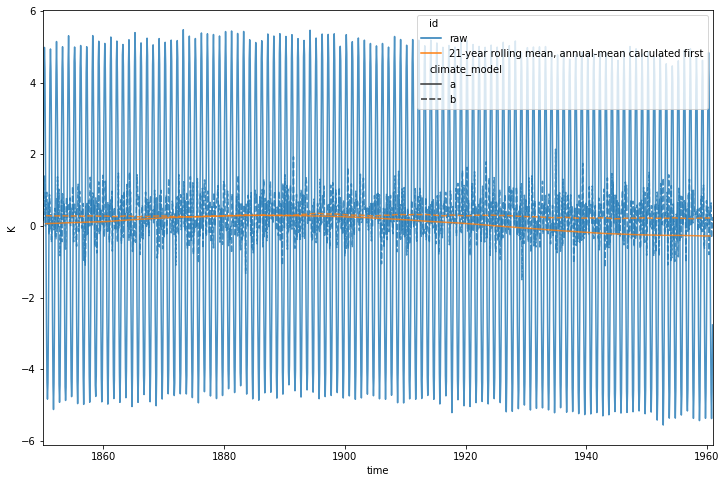

In [11]:
rolling_mean_252_window_annual_mean_first = (
    scmdata.ScmRun(start.time_mean("AC").timeseries().rolling(window=21, axis="columns", center=True, min_periods=0).mean())
)
rolling_mean_252_window_annual_mean_first["id"] = "21-year rolling mean, annual-mean calculated first"
display(rolling_mean_252_window_annual_mean_first.timeseries())
scmdata.run_append([start, rolling_mean_252_window_annual_mean_first]).lineplot(**pkwargs)

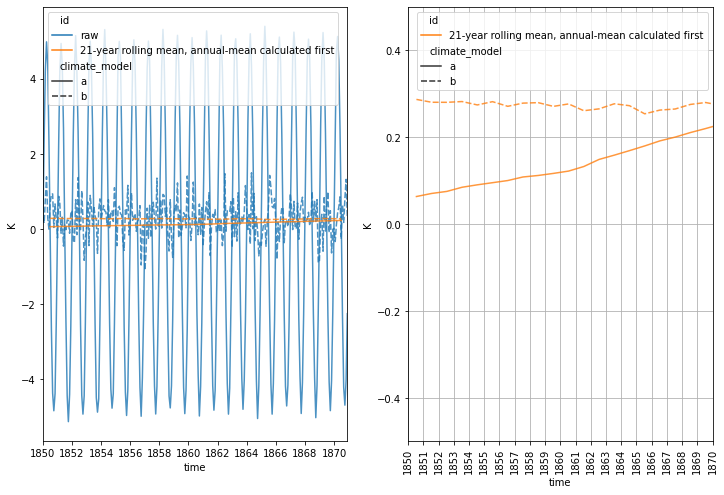

In [14]:
pdf = scmdata.run_append([start, rolling_mean_252_window_annual_mean_first])

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax2_years = range(1850, 1870 + 1)
pdf.filter(year=ax2_years).lineplot(**pkwargs, ax=ax1)
pdf.filter(year=ax2_years, **{"id": "*rolling mean*"}).lineplot(**pkwargs, ax=ax2, palette=["tab:orange"], time_axis="year-month")
ax2.set_ylim([-0.5, 0.5])
ax2.set_xlim([ax2_years[0], ax2_years[-1]])
ax2.set_xticks(ax2_years)
ax2.tick_params(axis="x", rotation=90)
ax2.grid()